In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.isnull().sum().sort_values(ascending=False).head(6)

,0
bmi,201
id,0
age,0
gender,0
hypertension,0
heart_disease,0


In [ ]:
df.shape

(5110, 12)

In [ ]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=np.nan,strategy='median')
impute.fit(df[['bmi']])
df[['bmi']]=impute.transform(df[['bmi']])


In [ ]:
df['bmi'].isnull().sum()

np.int64(0)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.drop('id',axis=1,inplace=True)

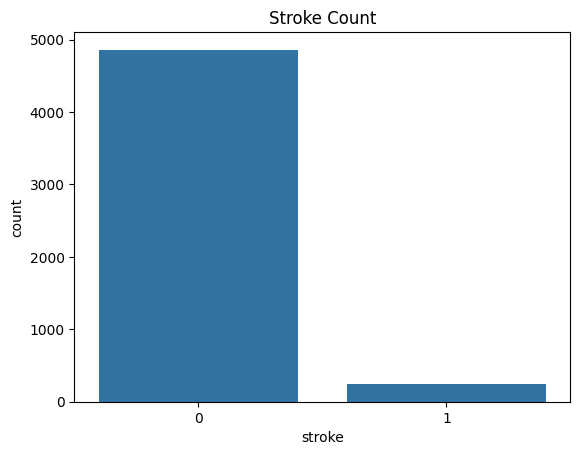

In [ ]:
sns.countplot(x='stroke', data=df)
plt.title('Stroke Count')
plt.show()


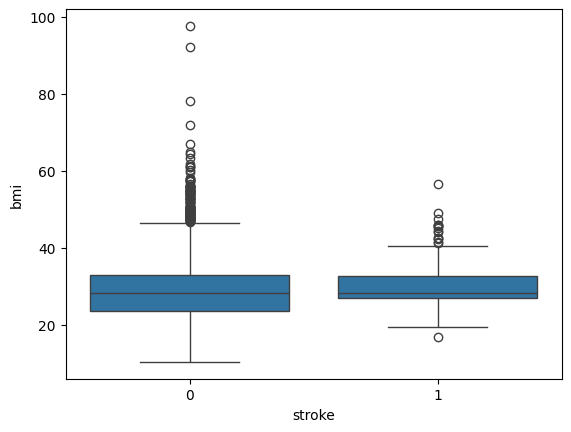

In [ ]:
sns.boxplot(x='stroke',y='bmi',data=df)
plt.show()

In [ ]:
numeric=df.select_dtypes(include=['int64','float64'])

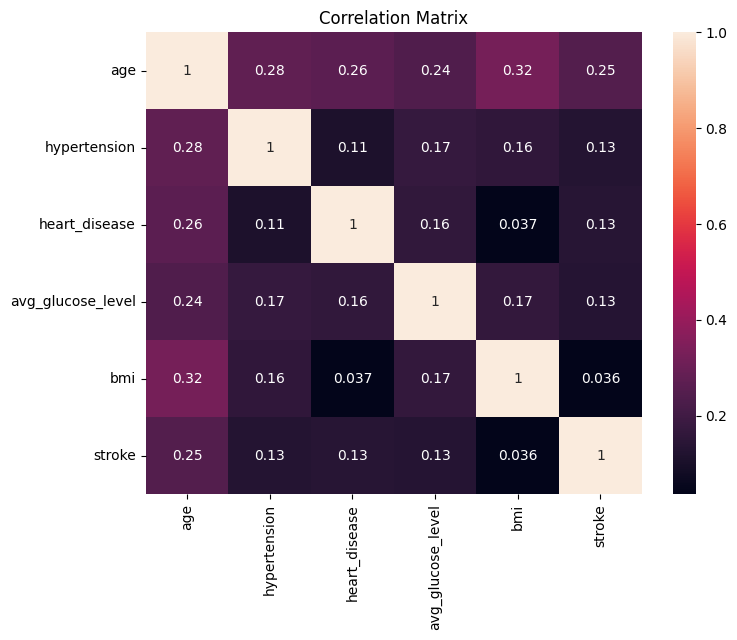

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(numeric.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()


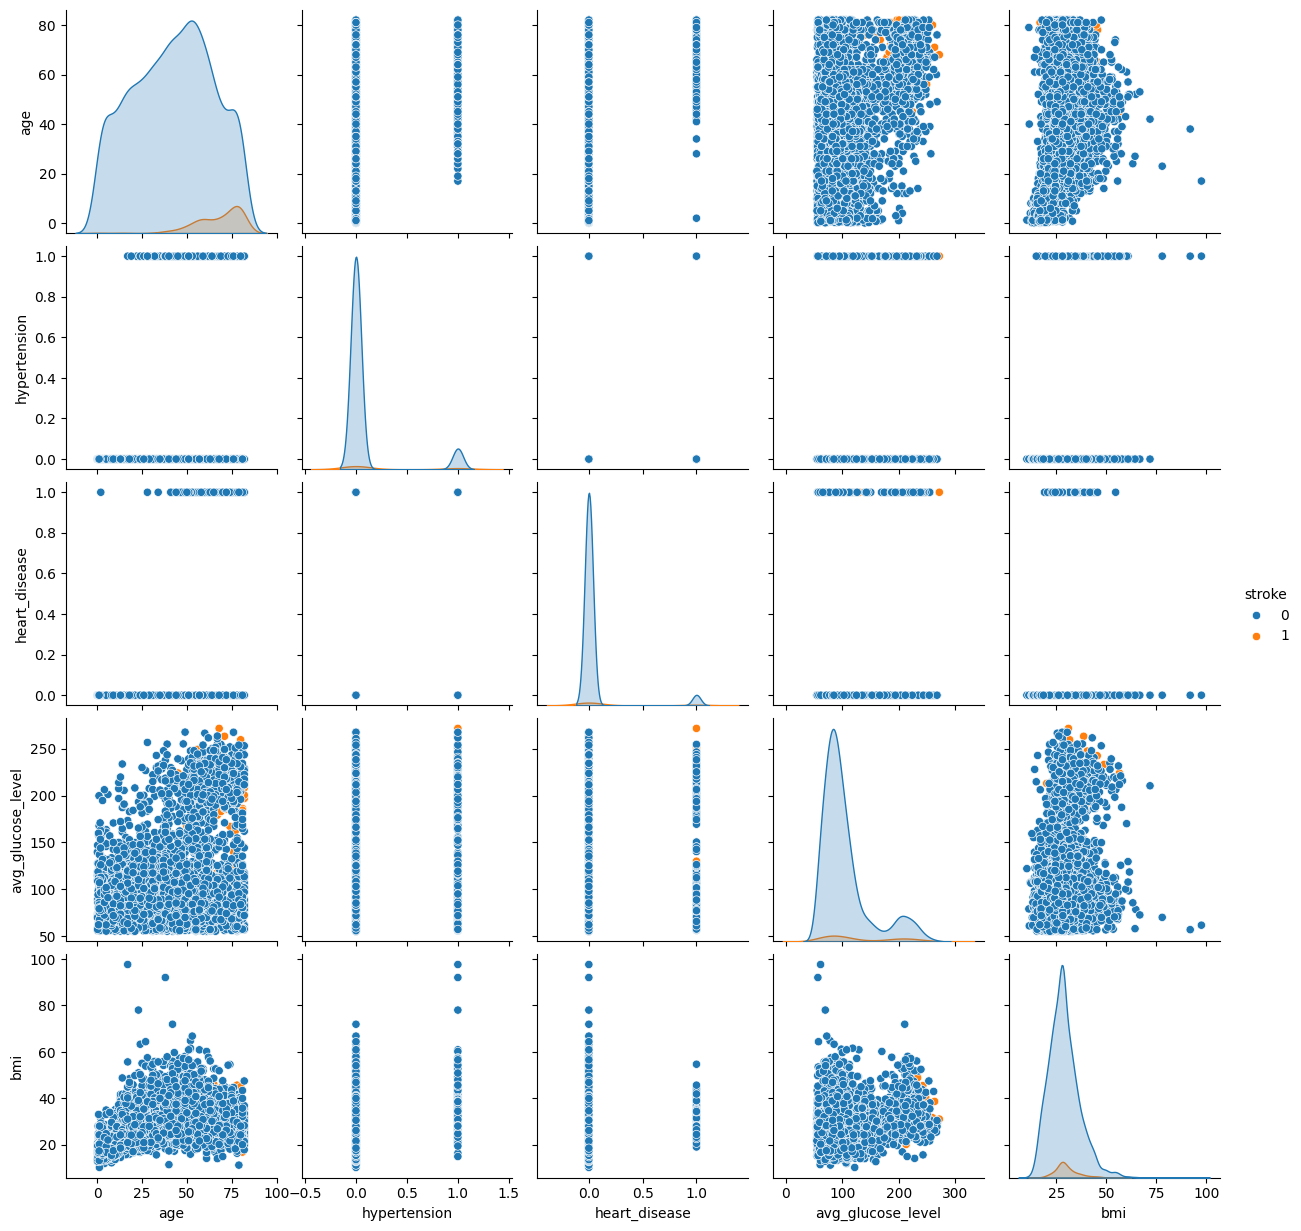

In [ ]:
sns.pairplot(df, hue='stroke')
plt.show()

In [ ]:
df.select_dtypes(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df[['gender']])
df['gender']=le.transform(df[['gender']])
df['ever_married']=le.fit_transform(df[['ever_married']])
df['Residence_type']=le.fit_transform(df[['Residence_type']])
df['work_type']=le.fit_transform(df[['work_type']])



In [ ]:
from sklearn.preprocessing import  OneHotEncoder
one=OneHotEncoder()
w=one.fit_transform(df[['smoking_status']]).toarray()

In [ ]:
w

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

In [ ]:
for index ,col in enumerate(one.categories_[0]):
   df[col]=w[:,index]

In [ ]:
df.drop('smoking_status',axis=1,inplace=True)

In [ ]:
X=df.drop('stroke',axis=1)
y=df['stroke']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4088, 13)
(1022, 13)
(4088,)
(1022,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , accuracy_score , precision_score , recall_score , f1_score ,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score

In [ ]:
models={
   " logistic regression":LogisticRegression(),
   "KNN":KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=1)
}

[[960   0]
 [ 62   0]]


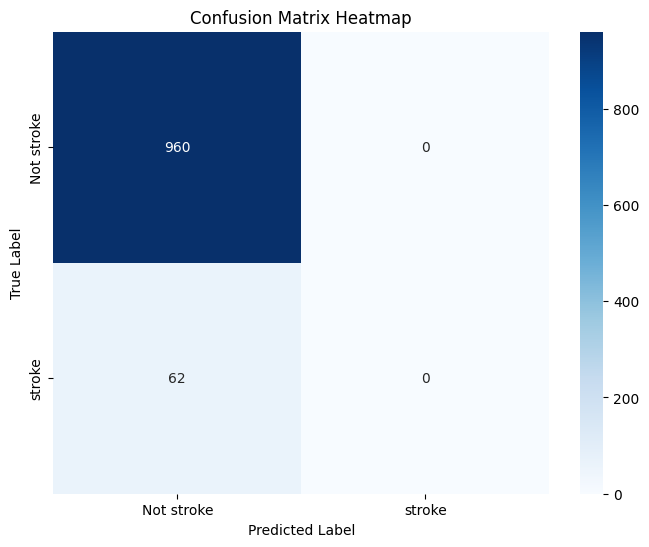

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

[[954   6]
 [ 59   3]]


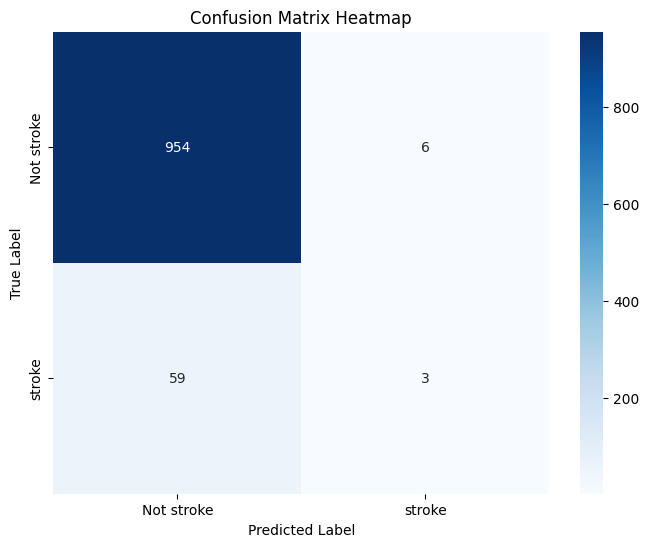

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.33      0.05      0.08        62

    accuracy                           0.94      1022
   macro avg       0.64      0.52      0.53      1022
weighted avg       0.90      0.94      0.91      1022



In [ ]:
accuracy=[]
for model_name , model in models.items():
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    Acc_Train = accuracy_score(y_train,y_pred_train)
    Acc_Test  =  accuracy_score(y_test,y_pred_test)


    Pre_Train = precision_score(y_train,y_pred_train,average='weighted')

    Pre_Test  =  precision_score(y_test,y_pred_test,average='weighted')

    Rec_Train = recall_score(y_train,y_pred_train,average='binary')
    Rec_Test  =  recall_score(y_test,y_pred_test,average='binary')

    F1_Train = f1_score(y_train,y_pred_train,average='binary')
    F1_Test  =  f1_score(y_test,y_pred_test,average='binary')

    accuracy.append([Acc_Train,Pre_Train,Rec_Train,F1_Train,Acc_Test,Pre_Test,Rec_Test,F1_Test])
    class_names=['Not stroke','stroke']
    cm = confusion_matrix(y_test,y_pred_test)
    print(cm)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix Heatmap')
    plt.show()
    print(classification_report(y_test,y_pred_test))
    y_probs = model.predict_proba(X_test)[:,1]





In [ ]:
accuracys = pd.DataFrame(accuracys,index=models.keys(),columns=['Acc','Pre','Rec','F1'])
accuracys

,Acc,Pre,Rec,F1
logistic regression,0.939335,0.0,0.0,0.0
KNN,0.939335,0.0,0.0,0.0


In [ ]:
pd.DataFrame(accuracy,columns=["Acc_Train","Pre_Train","Rec_Train","F1_Train",
                               "Acc_Test","Pre_Test","Rec_Test","F1_Test"],index=models.keys())

,Acc_Train,Pre_Train,Rec_Train,F1_Train,Acc_Test,Pre_Test,Rec_Test,F1_Test
logistic regression,0.954501,0.956572,0.005348,0.010638,0.939335,0.882350,0.000000,0.000000
KNN,0.955969,0.944748,0.069519,0.126214,0.936399,0.904847,0.048387,0.084507
